In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

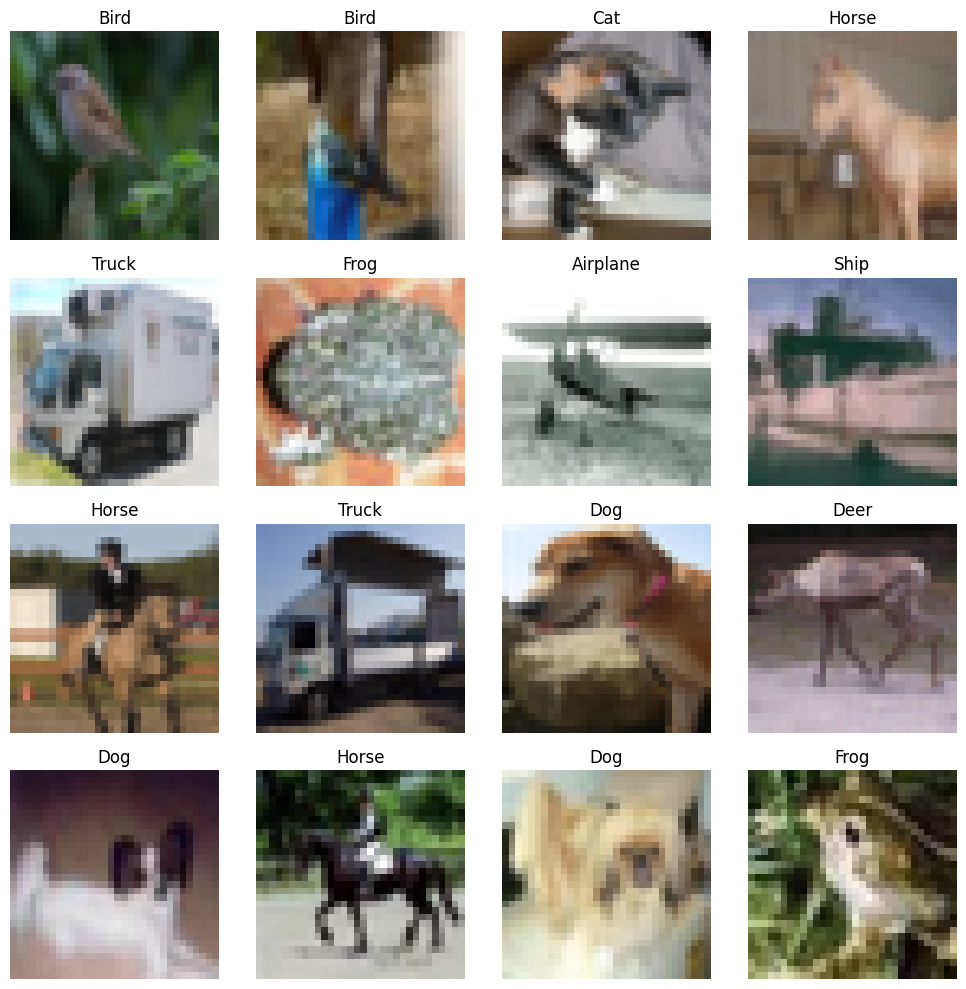

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def visualize_data(x, y, class_names, num_samples=16):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        index = np.random.randint(0, x.shape[0])
        plt.subplot(4, 4, i + 1)
        plt.imshow(x[index])

        if y.ndim == 2 and y.shape[1] > 1:
            label = np.argmax(y[index])
        else:
            label = int(y[index])

        plt.title(class_names[label])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_data(x_train, y_train, class_names)

In [ ]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
batch_size = 64
epochs = 5

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices)
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]

    train_loss = tf.keras.metrics.Mean()
    train_accuracy = tf.keras.metrics.CategoricalAccuracy()

    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled[i:i + batch_size]

        with tf.GradientTape() as tape:
            predictions = model(x_batch, training=True)
            loss_value = loss_fn(y_batch, predictions)

        gradients = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        train_loss.update_state(loss_value)
        train_accuracy.update_state(y_batch, predictions)

    train_loss_history.append(train_loss.result().numpy())
    train_accuracy_history.append(train_accuracy.result().numpy())

    val_predictions = model(x_test, training=False)
    val_loss = loss_fn(y_test, val_predictions).numpy()
    val_accuracy = tf.keras.metrics.CategoricalAccuracy()
    val_accuracy.update_state(y_test, val_predictions)

    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy.result().numpy())

    print(f"  Train Loss: {train_loss.result():.4f}, Train Accuracy: {train_accuracy.result():.4f}")
    print(f"  Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy.result():.4f}")

history = {
    'train_loss': train_loss_history,
    'train_accuracy': train_accuracy_history,
    'val_loss': val_loss_history,
    'val_accuracy': val_accuracy_history,
}

Epoch 1/5
  Train Loss: 1.5733, Train Accuracy: 0.4176
  Val Loss: 1.3127, Val Accuracy: 0.5452
Epoch 2/5
  Train Loss: 1.4574, Train Accuracy: 0.4637
  Val Loss: 1.2283, Val Accuracy: 0.5545
Epoch 3/5
  Train Loss: 1.3902, Train Accuracy: 0.4896
  Val Loss: 1.2249, Val Accuracy: 0.5608
Epoch 4/5
  Train Loss: 1.3231, Train Accuracy: 0.5156
  Val Loss: 1.1705, Val Accuracy: 0.6004
Epoch 5/5
  Train Loss: 1.2709, Train Accuracy: 0.5359
  Val Loss: 1.0692, Val Accuracy: 0.6306
